In [4]:
import os
import pandas as pd

# Creating the dataframe with 300 entries pr month for 12 months
# Get the directory where the script is located
base_dir = os.getcwd()

# Initialize list to collect dataframes
sampled_dfs = []

# Loop through subfolders in the current directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)

    # Skip if not a directory or not a month folder
    if not os.path.isdir(folder_path) or " " not in folder:
        continue

    csv_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv")

    if os.path.exists(csv_path):
        try:
            df = pd.read_csv(csv_path)

            # Sample 300 or all if less
            sample_size = min(300, len(df))
            sampled = df.sample(n=sample_size, random_state=42)

            sampled_dfs.append(sampled)

        except Exception as e:
            print(f"Error reading {csv_path}: {e}")

# Combine all samples
if sampled_dfs:
    df = pd.concat(sampled_dfs, ignore_index=True)
    print(df.head())
    # Optionally save:
    # combined_df.to_csv("sampled_data.csv", index=False)
else:
    print("No data sampled.")

   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK                FL_DATE  \
0  2024        3      7             6            6   7/6/2024 12:00:00 AM   
1  2024        3      7            27            6  7/27/2024 12:00:00 AM   
2  2024        3      7            10            3  7/10/2024 12:00:00 AM   
3  2024        3      7            11            4  7/11/2024 12:00:00 AM   
4  2024        3      7             6            6   7/6/2024 12:00:00 AM   

   OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_STATE_NM  ...  \
0              422.0              11057    CLT  North Carolina  ...   
1             3358.0              14869    SLC            Utah  ...   
2             1713.0              10397    ATL         Georgia  ...   
3             2134.0              14307    PVD    Rhode Island  ...   
4             1600.0              14908    SNA      California  ...   

          DEST_CITY_NAME  DEST_STATE_NM  CRS_DEP_TIME DEP_TIME CRS_ARR_TIME  \
0  Dallas/Fort Worth, TX       

In [5]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_NM,...,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,ARR_DEL15,ARR_TIME_BLK,FLIGHTS,DISTANCE
0,2024,3,7,6,6,7/6/2024 12:00:00 AM,422.0,11057,CLT,North Carolina,...,"Dallas/Fort Worth, TX",Texas,726,728.0,914,932.0,1.0,0900-0959,1.0,936.0
1,2024,3,7,27,6,7/27/2024 12:00:00 AM,3358.0,14869,SLC,Utah,...,"Las Vegas, NV",Nevada,2025,2019.0,2050,2034.0,0.0,2000-2059,1.0,368.0
2,2024,3,7,10,3,7/10/2024 12:00:00 AM,1713.0,10397,ATL,Georgia,...,"El Paso, TX",Texas,2035,2054.0,2138,2154.0,1.0,2100-2159,1.0,1282.0
3,2024,3,7,11,4,7/11/2024 12:00:00 AM,2134.0,14307,PVD,Rhode Island,...,"Washington, DC",Virginia,1720,1746.0,1855,1900.0,0.0,1800-1859,1.0,356.0
4,2024,3,7,6,6,7/6/2024 12:00:00 AM,1600.0,14908,SNA,California,...,"Provo, UT",Utah,1527,1522.0,1808,1805.0,0.0,1800-1859,1.0,565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2024,4,10,10,4,10/10/2024 12:00:00 AM,2523.0,11278,DCA,Virginia,...,"Orlando, FL",Florida,2000,NaN,2224,NaN,NaN,2200-2259,1.0,759.0
3596,2024,4,10,8,2,10/8/2024 12:00:00 AM,1522.0,10397,ATL,Georgia,...,"Columbus, OH",Ohio,1021,1016.0,1152,1143.0,0.0,1100-1159,1.0,447.0
3597,2024,4,10,25,5,10/25/2024 12:00:00 AM,3077.0,11292,DEN,Colorado,...,"Kansas City, MO",Missouri,1400,1401.0,1635,1632.0,0.0,1600-1659,1.0,533.0
3598,2024,4,10,19,6,10/19/2024 12:00:00 AM,1731.0,14869,SLC,Utah,...,"Los Angeles, CA",California,1046,1115.0,1140,1153.0,0.0,1100-1159,1.0,590.0


In [6]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Helper function to convert time from HHMM format (e.g., 1325)
# to minutes since midnight
def hhmm_to_minutes(x):
    """Convert HHMM time format (e.g., 1325) into minutes since midnight."""
    try:
        x = int(float(str(x).strip()))
        h, m = x // 100, x % 100
        return h * 60 + m
    except:
        return np.nan

# Convert actual and scheduled arrival times to minutes
# and compute arrival delay in minutes
df["ARR_TIME_MIN"] = df["ARR_TIME"].apply(hhmm_to_minutes)
df["CRS_ARR_TIME_MIN"] = df["CRS_ARR_TIME"].apply(hhmm_to_minutes)
df["ARR_DELAY_MIN"] = df["ARR_TIME_MIN"] - df["CRS_ARR_TIME_MIN"]

# Convert actual and scheduled departure times to minutes
# and compute departure delay in minutes
df["DEP_TIME_MIN"] = df["DEP_TIME"].apply(hhmm_to_minutes)
df["CRS_DEP_TIME_MIN"] = df["CRS_DEP_TIME"].apply(hhmm_to_minutes)
df["DEP_DELAY_MIN"] = df["DEP_TIME_MIN"] - df["CRS_DEP_TIME_MIN"]

# Drop columns that are not required for modeling
# (identifiers, descriptive fields, or post-flight information)
cols_to_drop = ['FL_DATE','ARR_DEL15','FLIGHTS','DEST_CITY_NAME','ORIGIN_STATE_NM','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID','ARR_TIME_BLK'
]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Preview the cleaned dataset
df.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,DEP_TIME,CRS_ARR_TIME,ARR_TIME,DISTANCE,ARR_TIME_MIN,CRS_ARR_TIME_MIN,ARR_DELAY_MIN,DEP_TIME_MIN,CRS_DEP_TIME_MIN,DEP_DELAY_MIN
0,2024,3,7,6,6,422.0,11057,CLT,11298,DFW,...,728.0,914,932.0,936.0,572.0,554,18.0,448.0,446,2.0
1,2024,3,7,27,6,3358.0,14869,SLC,12889,LAS,...,2019.0,2050,2034.0,368.0,1234.0,1250,-16.0,1219.0,1225,-6.0
2,2024,3,7,10,3,1713.0,10397,ATL,11540,ELP,...,2054.0,2138,2154.0,1282.0,1314.0,1298,16.0,1254.0,1235,19.0
3,2024,3,7,11,4,2134.0,14307,PVD,11278,DCA,...,1746.0,1855,1900.0,356.0,1140.0,1135,5.0,1066.0,1040,26.0
4,2024,3,7,6,6,1600.0,14908,SNA,14314,PVU,...,1522.0,1808,1805.0,565.0,1085.0,1088,-3.0,922.0,927,-5.0


In [7]:
# Encode the scheduled departure time as cyclical features
# This transformation captures the periodic nature of time within a 24-hour day
# (e.g., flights at 23:55 and 00:05 are temporally close)
df["DEP_TIME_sin"] = np.sin(2 * np.pi * df["CRS_DEP_TIME_MIN"] / 1440)
df["DEP_TIME_cos"] = np.cos(2 * np.pi * df["CRS_DEP_TIME_MIN"] / 1440)

# Preview the updated dataset with the new cyclical features
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,ARR_TIME,DISTANCE,ARR_TIME_MIN,CRS_ARR_TIME_MIN,ARR_DELAY_MIN,DEP_TIME_MIN,CRS_DEP_TIME_MIN,DEP_DELAY_MIN,DEP_TIME_sin,DEP_TIME_cos
0,2024,3,7,6,6,422.0,11057,CLT,11298,DFW,...,932.0,936.0,572.0,554,18.0,448.0,446,2.0,0.930418,-0.366501
1,2024,3,7,27,6,3358.0,14869,SLC,12889,LAS,...,2034.0,368.0,1234.0,1250,-16.0,1219.0,1225,-6.0,-0.806445,0.591310
2,2024,3,7,10,3,1713.0,10397,ATL,11540,ELP,...,2154.0,1282.0,1314.0,1298,16.0,1254.0,1235,19.0,-0.779884,0.625923
3,2024,3,7,11,4,2134.0,14307,PVD,11278,DCA,...,1900.0,356.0,1140.0,1135,5.0,1066.0,1040,26.0,-0.984808,-0.173648
4,2024,3,7,6,6,1600.0,14908,SNA,14314,PVU,...,1805.0,565.0,1085.0,1088,-3.0,922.0,927,-5.0,-0.785317,-0.619094


In [8]:
# Define the feature list for Gradient Boosting (avoid high-cardinality identifiers)
features = [
    "MONTH",
    "DAY_OF_WEEK",
    "DAY_OF_MONTH",
    "DISTANCE",
    "ORIGIN",
    "DEST",
    "DEP_TIME_sin",
    "DEP_TIME_cos"
]

# Quick check: ensure all selected features exist in df
missing = [c for c in features if c not in df.columns]
print("Missing columns:", missing)

# If nothing is missing, build X
if not missing:
    X = df[features].copy()
    print("X shape:", X.shape)
    X.head()

Missing columns: []
X shape: (3600, 8)


In [9]:
X = df[features].copy()
y = df["DEP_DELAY_MIN"].copy()

X

,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,DISTANCE,ORIGIN,DEST,DEP_TIME_sin,DEP_TIME_cos
0,7,6,6,936.0,CLT,DFW,0.930418,-0.366501
1,7,6,27,368.0,SLC,LAS,-0.806445,0.591310
2,7,3,10,1282.0,ATL,ELP,-0.779884,0.625923
3,7,4,11,356.0,PVD,DCA,-0.984808,-0.173648
4,7,6,6,565.0,SNA,PVU,-0.785317,-0.619094
...,...,...,...,...,...,...,...,...
3595,10,4,10,759.0,DCA,MCO,-0.866025,0.500000
3596,10,2,8,447.0,ATL,CMH,0.418660,-0.908143
3597,10,5,25,533.0,DEN,MCI,-0.500000,-0.866025
3598,10,6,19,590.0,SLC,LAX,0.317305,-0.948324


In [11]:
# ===== Feature selection for Gradient Boosting (pre-departure only) =====

# Selected features (avoid high-cardinality identifiers such as flight number / tail number)
features = [
    "MONTH",
    "DAY_OF_WEEK",
    "DAY_OF_MONTH",
    "DISTANCE",
    "ORIGIN",
    "DEST",
    "DEP_TIME_sin",
    "DEP_TIME_cos"
]

# Check that all selected features exist in the DataFrame
missing = [c for c in features if c not in df.columns]
if missing:
    raise KeyError(f"Missing required feature columns: {missing}")

# Build the feature matrix
X = df[features].copy()

print("Selected features:", features)
print("X shape:", X.shape)
X.head()

Selected features: ['MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'DISTANCE', 'ORIGIN', 'DEST', 'DEP_TIME_sin', 'DEP_TIME_cos']
X shape: (3600, 8)


,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,DISTANCE,ORIGIN,DEST,DEP_TIME_sin,DEP_TIME_cos
0,7,6,6,936.0,CLT,DFW,0.930418,-0.366501
1,7,6,27,368.0,SLC,LAS,-0.806445,0.591310
2,7,3,10,1282.0,ATL,ELP,-0.779884,0.625923
3,7,4,11,356.0,PVD,DCA,-0.984808,-0.173648
4,7,6,6,565.0,SNA,PVU,-0.785317,-0.619094


In [12]:
# ===== Train / Test split =====

# Drop rows where the target variable is missing
df = df.dropna(subset=["DEP_DELAY_MIN"])

# Align X and y after dropping missing targets
X = X.loc[df.index]
y = df["DEP_DELAY_MIN"]

from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2831, 8)
Test set shape: (708, 8)


In [13]:
# ===== Gradient Boosting baseline model =====

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
import scipy.sparse as sp

# Identify categorical and numerical features from X_train
categorical_features = ["ORIGIN", "DEST"]
numerical_features = [
    "MONTH",
    "DAY_OF_WEEK",
    "DAY_OF_MONTH",
    "DISTANCE",
    "DEP_TIME_sin",
    "DEP_TIME_cos"
]

# One-hot encoder (version-safe)
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Preprocessing: encode categoricals, pass through numericals
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", ohe, categorical_features),
        ("num", "passthrough", numerical_features)
    ],
    remainder="drop",
    sparse_threshold=0.0
)

# Safety: ensure dense output
to_dense = FunctionTransformer(
    lambda X: X.toarray() if sp.issparse(X) else X,
    accept_sparse=True
)

# Initialize Gradient Boosting regressor (baseline configuration)
gb_model = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.08,
    max_iter=300,
    min_samples_leaf=20,
    early_stopping=True,
    random_state=42
)

# Full pipeline: preprocessing + model
gb_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("dense", to_dense),
    ("model", gb_model)
])

# Train the model
gb_pipeline.fit(X_train, y_train)

print("Gradient Boosting baseline model trained successfully!")

Gradient Boosting baseline model trained successfully!


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = gb_pipeline.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Gradient Boosting (Baseline) performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")

Gradient Boosting (Baseline) performance:
RMSE: 87.43
MAE : 26.21
R²  : 0.142


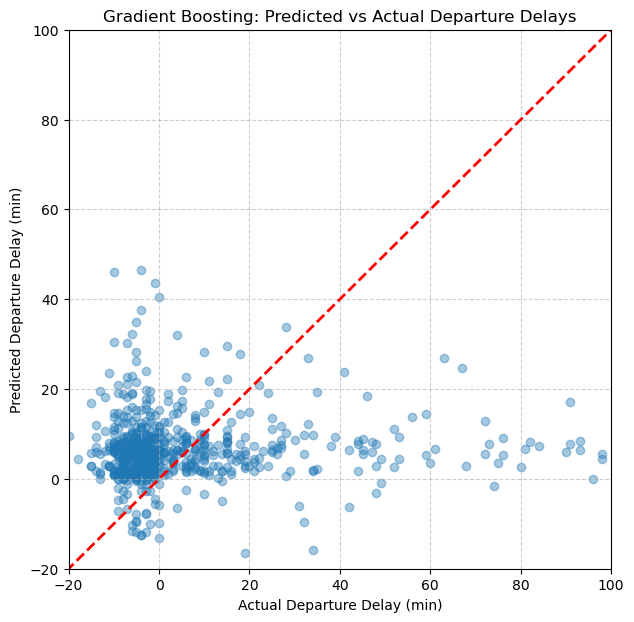

In [15]:
import matplotlib.pyplot as plt

# --- Predicted vs Actual (Gradient Boosting) ---
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.xlabel("Actual Departure Delay (min)")
plt.ylabel("Predicted Departure Delay (min)")
plt.title("Gradient Boosting: Predicted vs Actual Departure Delays")

plt.xlim(-20, 100)
plt.ylim(-20, 100)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [16]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Compute permutation importance on the test set
perm_importance = permutation_importance(
    gb_pipeline,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="neg_mean_absolute_error"
)

# Build a DataFrame with results
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": perm_importance.importances_mean
}).sort_values(by="importance", ascending=False)

# Display top 15 features
feature_importance_df.head(15)

,feature,importance
7,DEP_TIME_cos,1.441664
0,MONTH,0.433750
6,DEP_TIME_sin,0.254598
2,DAY_OF_MONTH,0.078800
1,DAY_OF_WEEK,0.041556
3,DISTANCE,-0.060920
5,DEST,-0.180851
4,ORIGIN,-0.292382


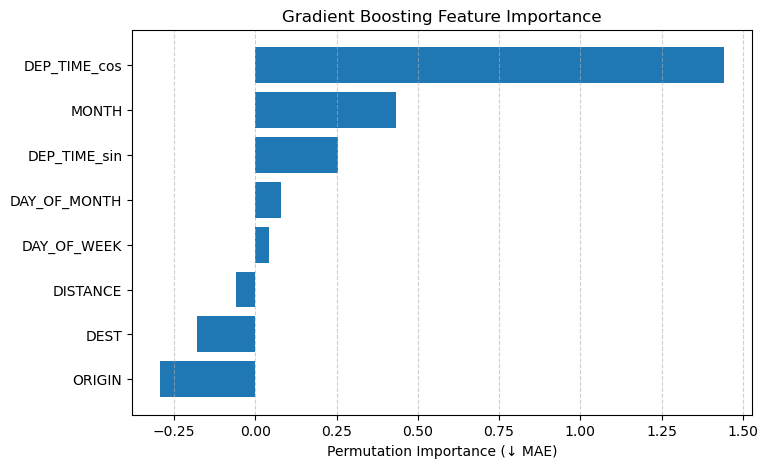

In [17]:
#Feature importance visualization
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df.head(15)["feature"][::-1],
    feature_importance_df.head(15)["importance"][::-1]
)
plt.xlabel("Permutation Importance (↓ MAE)")
plt.title("Gradient Boosting Feature Importance")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


In [18]:
# ===== Gradient Boosting – Hyperparameter tuning =====

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import time

start_time = time.time()

# Base model (same preprocessing pipeline as baseline)
gb_model = HistGradientBoostingRegressor(
    loss="squared_error",
    early_stopping=True,
    random_state=42
)

gb_pipeline_opt = Pipeline([
    ("preprocess", preprocessor),
    ("dense", to_dense),
    ("model", gb_model)
])

# Hyperparameter space (small but meaningful)
param_distributions = {
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_iter": [200, 400, 600],
    "model__max_depth": [3, 5, None],
    "model__min_samples_leaf": [10, 20, 50],
    "model__l2_regularization": [0.0, 0.1, 0.5]
}

# 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=gb_pipeline_opt,
    param_distributions=param_distributions,
    n_iter=15,  # small but effective
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit only on training data
search.fit(X_train, y_train)

print("Best hyperparameters:")
print(search.best_params_)
print(f"Best CV RMSE: {-search.best_score_:.2f}")

# Evaluate optimized model on test set
best_gb = search.best_estimator_
y_pred_opt = best_gb.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_opt) ** 0.5
mae = mean_absolute_error(y_test, y_pred_opt)
r2 = r2_score(y_test, y_pred_opt)

print("\nOptimized Gradient Boosting performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")

print(f"\nTotal tuning time: {time.time() - start_time:.1f} seconds")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best hyperparameters:
{'model__min_samples_leaf': 10, 'model__max_iter': 600, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__l2_regularization': 0.0}
Best CV RMSE: 110.91

Optimized Gradient Boosting performance:
RMSE: 84.88
MAE : 24.28
R²  : 0.192

Total tuning time: 6.9 seconds


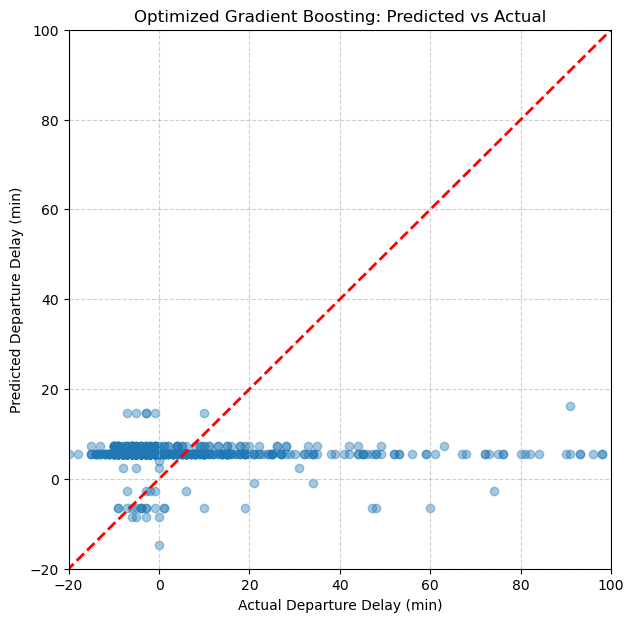

In [19]:
import matplotlib.pyplot as plt

# --- Predicted vs Actual (Optimized Gradient Boosting) ---
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_opt, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2
)

plt.xlabel("Actual Departure Delay (min)")
plt.ylabel("Predicted Departure Delay (min)")
plt.title("Optimized Gradient Boosting: Predicted vs Actual")

plt.xlim(-20, 100)
plt.ylim(-20, 100)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
